# Globular cluster surface density profiles

Figure 8.2 from Chapter 8 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots of surface density of two nearby globular clusters NGC 6366 (d=3.5kpc) and 47 Tucanae (d=4.5kpc) along
with King Models:
 * NGC 6366: $W_0$=4.8 and $r_t$=20.6 arcmin (21 pc)
 * 47 Tuc: $W_0$=8.6 and $r_t$=40.1 arcmin (52 pc)
 
Data are from de Boer et al. [2019, MNRAS, 485, 4906](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.4906D) with
the profiles on his [GitHub repository](https://github.com/tdboer/GC_profiles), folder `stitched_profiles/`


In [8]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [9]:
plotFile = 'Fig8_2.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Surface density profiles

Data are in files `NGC6366_deBoer.txt` and `47Tuc_deBoer.txt`.  These are 3-column ASCII format:
 * `rad` - radius in arcminutes
 * `density` - surface density in sstars/arcmin$^2$
 * `density_err` - surface density error

Original data files are from de Boer's [GitHub repository](https://github.com/tdboer/GC_profiles), file `stitched_profiles/ngc6366_numdens_profile` and `stitched_profiles/ngc104_numdens_profile`, respectively.
We've added comment headers to de Boer's original files to identify the data for this notebook.

### King Model

Pre-computed King Models for each are in files `NGC6366_KingModel.txt` and `47Tuc_KingModel.txt`, respectively.
Data are in 2-column ASCII format:
 * `log_r` - log$_{10}$r in arcminutes
 * `log_Sigma` - log$_{10}\Sigma$ in stars/arcmin$^2$

In [10]:
gcList = ['NGC6366','47Tuc']

r_obs = {}
sd_obs = {}
sd_err = {}
r_king = {}
sd_king = {}

for gc in gcList:
    dataFile = f'{gc}_deBoer.txt'
    data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
    r_obs[gc] = np.array(data['rad'])
    sd_obs[gc] = np.array(data['density'])
    sd_err[gc] = np.array(data['density_err'])

    dataFile = f'{gc}_KingModel.txt'
    data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
    r_king[gc] = 10.0**np.array(data['log_r'])
    sd_king[gc] = 10.0**np.array(data['log_Sigma'])
    
# model background

bkg = {}
bkg['NGC6366'] = 1.38 # stars/arcmin^2
bkg['47Tuc'] = 0.075

# plotting limits (same for both)

rMin = 0.005 # arcmin
rMax = 100

sdMin = 0.03 # stars/arcmin^2
sdMax = 2.0e5

## Figure 8.2: side by side format

Left panel: NGC 6366 $\Sigma$ vs $r$ as a log-log plot, data as filled circles with error bars, King model as a solid line

Right panel: 47 Tuc $\Sigma$ vs $r$ as a log-log plot, data as filled circles with error bars, King model as a solid line

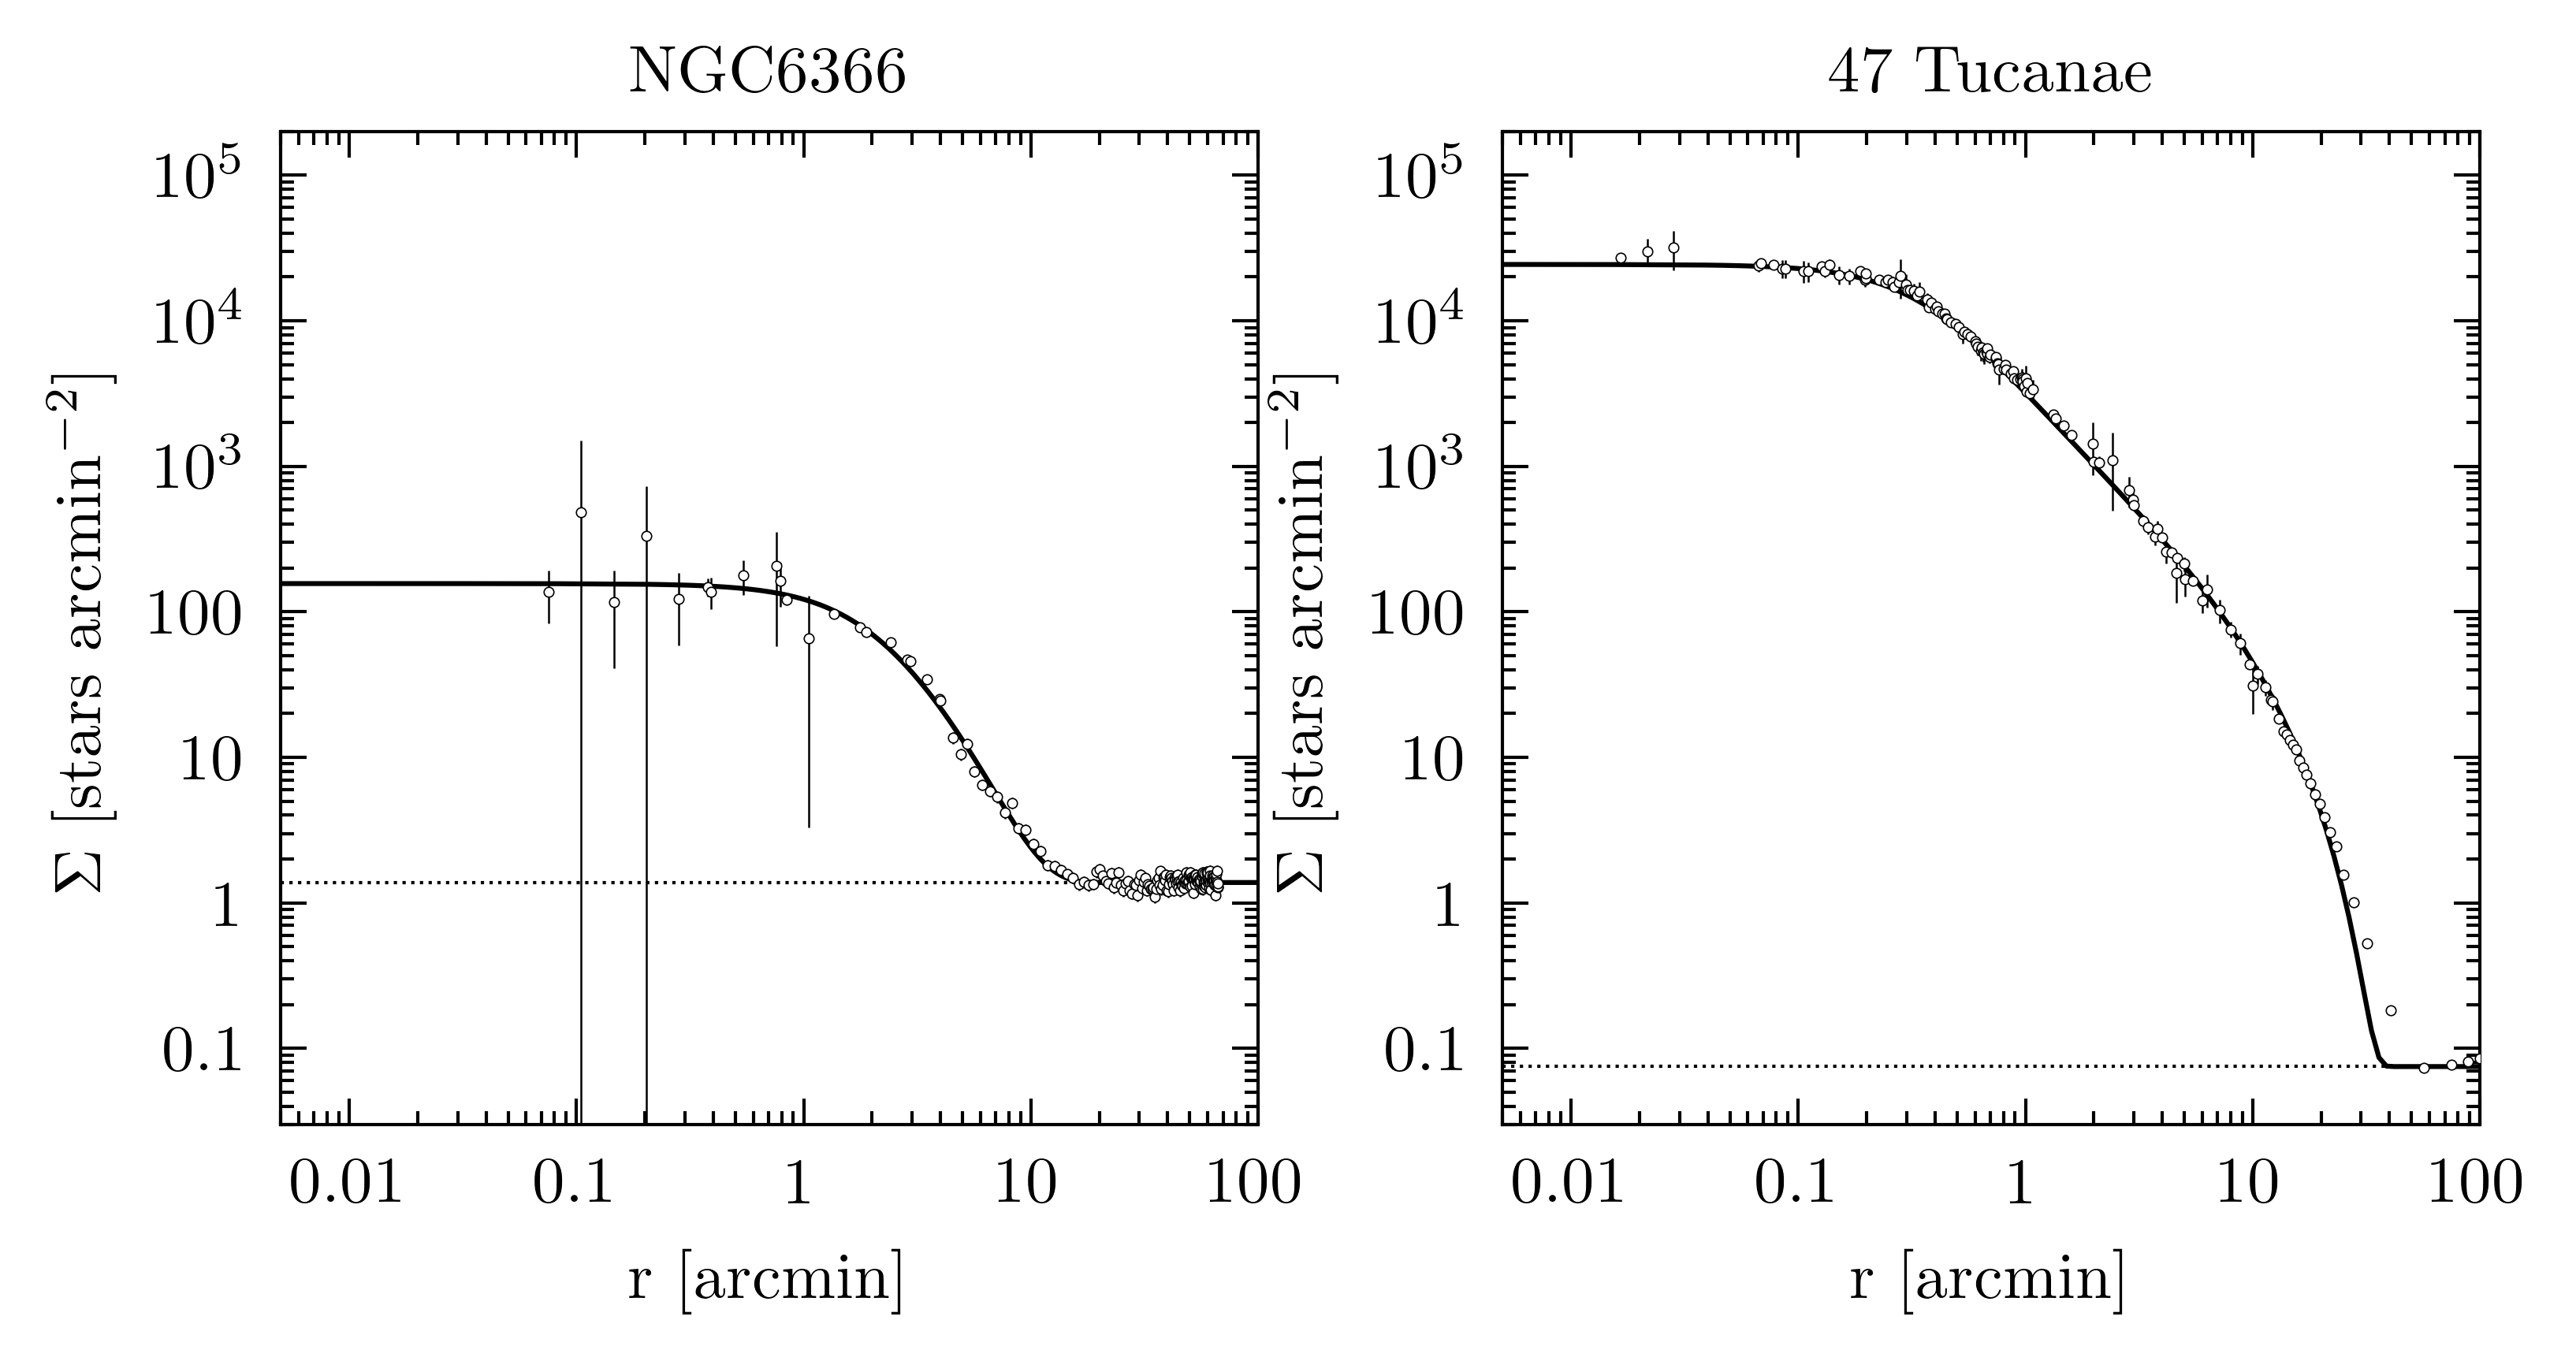

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: NGC6366

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(rMin,rMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.01,0.1,1,10,100])
ax1.set_xticklabels(['0.01','0.1','1','10','100'])
ax1.set_xlabel(r'r [arcmin]',fontsize=axisFontSize)

ax1.set_ylim(sdMin,sdMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([0.1,1,10,100,1e3,1e4,1e5])
ax1.set_yticklabels(['0.1','1','10','100','$10^3$','10$^4$','10$^5$'])
ax1.set_ylabel(r'$\Sigma$ [stars arcmin$^{-2}$]',fontsize=axisFontSize)

ax1.errorbar(r_obs['NGC6366'],sd_obs['NGC6366'],yerr=sd_err['NGC6366'],fmt='o',ms=1.5,mfc='white',mec='black',
             mew=0.2,ecolor='black',elinewidth=0.3,capsize=0.0,zorder=10)
ax1.plot(r_king['NGC6366'],sd_king['NGC6366'],'-',lw=0.75,color='black',zorder=9)

ax1.hlines(bkg['NGC6366'],rMin,rMax,ls=[':'],colors=['black'],lw=0.5,zorder=8)

ax1.set_title('NGC6366',fontsize=axisFontSize)

# right panel: 47 Tucanae

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(rMin,rMax)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([0.01,0.1,1,10,100])
ax2.set_xticklabels(['0.01','0.1','1','10','100'])
ax2.set_xlabel(r'r [arcmin]',fontsize=axisFontSize)

ax2.set_ylim(sdMin,sdMax)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_yticks([0.1,1,10,100,1e3,1e4,1e5])
ax2.set_yticklabels(['0.1','1','10','100','$10^3$','10$^4$','10$^5$'])
ax2.set_ylabel(r'$\Sigma$ [stars arcmin$^{-2}$]',fontsize=axisFontSize)

ax2.errorbar(r_obs['47Tuc'],sd_obs['47Tuc'],yerr=sd_err['47Tuc'],fmt='o',ms=1.5,mfc='white',mec='black',
             mew=0.2,ecolor='black',elinewidth=0.3,capsize=0.0,zorder=10)
ax2.plot(r_king['47Tuc'],sd_king['47Tuc'],'-',lw=0.75,color='black',zorder=9)

# background at Sigma=0.1

ax2.hlines(bkg['47Tuc'],rMin,rMax,ls=[':'],colors=['black'],lw=0.5,zorder=8)

ax2.set_title('47 Tucanae',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')